In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from music21.stream import Stream, Score, Part, Measure
from music21.clef import Clef
from music21.note import Note, Unpitched
from music21.duration import Duration
from music21 import midi
from music21.instrument import *
from music21.meter import TimeSignature

In [3]:
def step(data, patterns, padding=None, padding_type=None):
    data = np.asarray(data, dtype=np.bool)
    assert len(data.shape) == 1
    patterns = np.asarray(patterns, dtype=np.bool)
    assert len(patterns.shape) == 2
    
    k = patterns.shape[1]
    
    if padding is None:
        padding = k // 2
        
    if padding_type is None:
        padding_type = lambda n, dtype: np.random.randint(0, 2, n, dtype=dtype)
    
    result = padding_type(data.shape[0], dtype=np.bool)
    for (p,), _ in np.ndenumerate(data[:-k]):
        result[padding + p] = np.any(np.all(patterns == data[p : p+k], axis=1))
    return result

In [4]:
# Skala Ciszy
scale_silent = {
#     20: "C3",
#     21: "C#3",
#     22: "D3",
#     23: "D#3",
#     24: "E3",
#     25: "F3",
#     26: "F#3",
#     27: "G3",
#     28: "G#3",
#     29: "A3",
#     30: "A#3",
#     31: "B3",
#     32: "C4",
#     33: "C#4",
#     34: "D4",
#     35: "D#4",
#     36: "E4",
#     37: "F4",
#     38: "F#4",
#     39: "G4",
#     40: "G#4",
#     41: "A4",
#     42: "A#4",
#     43: "B4",
#     44: "C5",
}

In [5]:
# 12
scale_dode = {
    20: "C3",
    21: "C#3",
    22: "D3",
    23: "D#3",
    24: "E3",
    25: "F3",
    26: "F#3",
    27: "G3",
    28: "G#3",
    29: "A3",
    30: "A#3",
    31: "B3",
    32: "C4",
    33: "C#4",
    34: "D4",
    35: "D#4",
    36: "E4",
    37: "F4",
    38: "F#4",
    39: "G4",
    40: "G#4",
    41: "A4",
    42: "A#4",
    43: "B4",
    44: "C5",
}

In [6]:
# Pentatonika
scale_pentatonic = {
    20: "C3",
#     21: "C#3",
#     22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
#     34: "D4",
    35: "D#4",
#     36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
#     40: "G#4",
#     41: "A4",
    42: "A#4",
#     43: "B4",
    44: "C5",
}

In [7]:
# Skala Dorycka
scale_doric = {
    20: "C3",
#     21: "C#3",
    22: "D3",
#     23: "D#3",
    24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
#     35: "D#4",
    36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
#     40: "G#4",
    41: "A4",
#     42: "A#4",
    43: "B4",
    44: "C5",
}

In [8]:
# Skala Eolska
scale_aeolian = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    35: "D#4",
#     36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
    40: "G#4",
#     41: "A4",
    42: "A#4",
#     43: "B4",
    44: "C5",
}

In [9]:
# Skala Harmoniczna
scale_harmonic = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "E-3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "A-3",
#     29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    35: "E-4",
#     36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
    40: "A-4",
#     41: "A4",
#     42: "A#4",
    43: "B4",
    44: "C5",
}

In [10]:
# Skala Melodyczna
scale_melodic = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    35: "D#4",
#     36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
#     40: "G#4",
    41: "A4",
#     42: "A#4",
    43: "B4",
    44: "C5",
}

In [11]:
# Skala Bluesowa
scale_blues = {
    20: "C3",
#     21: "C#3",
#     22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
    26: "F#3",
    27: "G3",
#     28: "G#3",
#     29: "A3",
    30: "A#3",
#     31: "B3",
    32: "C4",
#     33: "C#4",
#     34: "D4",
    35: "D#4",
#     36: "E4",
    37: "F4",
    38: "F#4",
    39: "G4",
#     40: "G#4",
#     41: "A4",
    42: "A#4",
#     43: "B4",
    44: "C5",
}

In [12]:
# Skala Jazzowa
scale_jazz = {
    20: "C3",
#     21: "C#3",
    22: "D3",
    23: "D#3",
#     24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
#     28: "G#3",
    29: "A3",
#     30: "A#3",
    31: "B3",
    32: "C4",
#     33: "C#4",
    34: "D4",
    35: "D#4",
#     36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
#     40: "G#4",
    41: "A4",
#     42: "A#4",
    43: "B4",
    44: "C5",
}

In [13]:
# Skala Cygańska
scale_gipsy = {
    20: "C3",
    21: "C#3",
#     22: "D3",
#     23: "D#3",
    24: "E3",
    25: "F3",
#     26: "F#3",
    27: "G3",
    28: "G#3",
    29: "A3",
#     30: "A#3",
#     31: "B3",
    32: "C4",
    33: "C#4",
#     34: "D4",
#     35: "D#4",
    36: "E4",
    37: "F4",
#     38: "F#4",
    39: "G4",
    40: "G#4",
    41: "A4",
#     42: "A#4",
#     43: "B4",
    44: "C5",
}

In [14]:
def play(stream):
    player = midi.realtime.StreamPlayer(stream)
    player.play()

In [15]:
def make_scale_stream(scale):
    stream = Stream()
    
    for scale_item in sorted(scale):
        note = Note(scale[scale_item])
        note.duration = Duration(0.25)
        stream.append(note)
    return stream

In [16]:
def make_scale_score(scale):
    score = Score()
    
    part = Part()
    part.append(Woodblock())
    measure = Measure()
    for scale_item in sorted(scale):
        note = Note(scale[scale_item])
        note.duration = Duration(0.25)
        measure.append(note)
    part.append(measure)
    score.append(part)
    
    return score

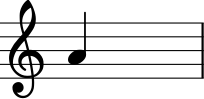

In [17]:
n = Note("A", type='quarter')

drumPart = Part()
drumPart.insert(0, Woodblock())

drumMeasure = Measure()
drumMeasure.append(n)
drumPart.append(drumMeasure)

drumPart.show()
play(drumPart)

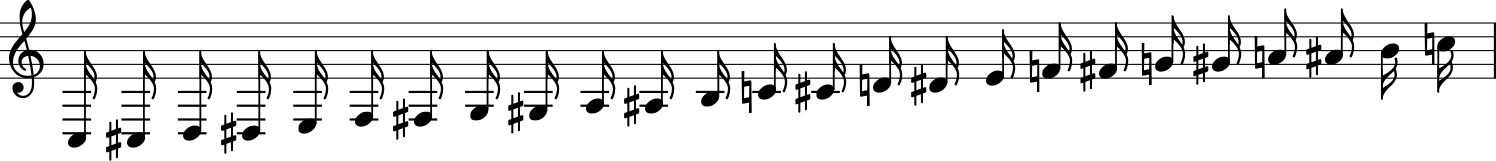

In [18]:
stream = make_scale_score(scale_dode)
stream.show()
play(stream)

In [19]:
def make_stream(data, scale, preprocessor=None):
    stream = Stream()
    
    if preprocessor is not None:
        data = preprocessor(data, scale)
    
    for position in range(len(data)):
        for scale_item in scale:
            if data[position][scale_item]:
                if position == 0 or not data[position-1][scale_item]:
                    duration = 1
                    while position + duration < len(data) \
                            and data[position + duration - 1][scale_item]:
                        duration += 1
                    note = Note(scale[scale_item])
                    note.duration = Duration(duration/4)
                    stream.insert(position/2, note)
                    
    return stream

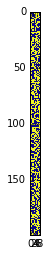

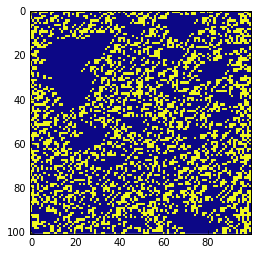

In [20]:
data = [np.random.randint(0, 2, 100, dtype=np.bool)]
patterns = np.random.randint(0, 2, (200, 9), dtype=np.bool)

plt.imshow(patterns, interpolation="none", cmap="plasma")
plt.show()

for _ in range(100):
    data.append(step(data[-1], patterns))
plt.imshow(data, interpolation="none", cmap="plasma")

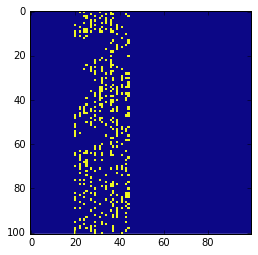

In [21]:
def preprocess_remove_nonscale(data, scale):
    data = np.asarray(data, dtype=np.bool)
    available_notes = np.array(list(scale.keys()))
    
    mask = np.zeros_like(data[0], dtype=np.bool)
    mask[available_notes] = True
    
    data = data * mask
    return data

plt.imshow(preprocess_remove_nonscale(data, scale_doric), interpolation="none", cmap="plasma")

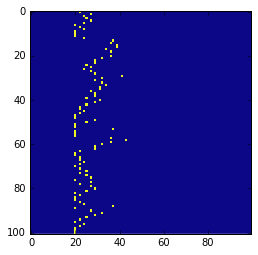

In [22]:
def preprocess_get_bottom(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        if len(nonzeros) > 0:
            mask[nonzeros[0]] = True
        line *= mask
    return data

plt.imshow(preprocess_get_bottom(data, scale_doric), interpolation="none", cmap="plasma")

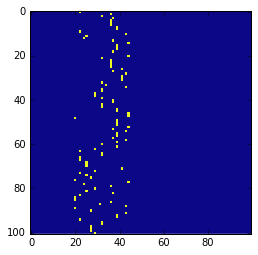

In [23]:
def preprocess_get_random(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    last = None
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        
        if len(nonzeros) > 0:
            mask[np.random.choice(nonzeros)] = True
        
        if last is not None:
            if np.any(last * line):
                line *= last
            else:
                line *= mask
        else:
            line *= mask
        last = line
    return data

plt.imshow(preprocess_get_random(data, scale_doric), interpolation="none", cmap="plasma")

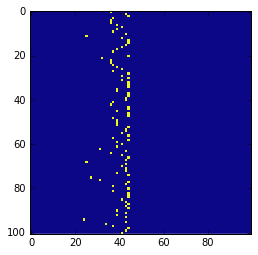

In [24]:
def preprocess_get_top(data, scale):
    data = preprocess_remove_nonscale(data, scale)
    for line in data:
        nonzeros = np.nonzero(line)[0]
        
        mask = np.zeros_like(line, dtype=np.bool)
        if len(nonzeros) > 0:
            mask[nonzeros[-1]] = True
        line *= mask
    return data

plt.imshow(preprocess_get_top(data, scale_doric), interpolation="none", cmap="plasma")

In [25]:
scale = scale_doric

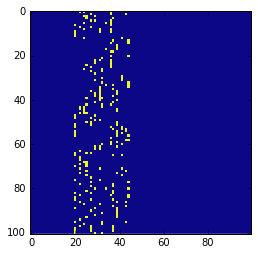

In [26]:
playable_data = preprocess_get_bottom(data, scale) \
    + preprocess_get_random(data, scale) \
    + preprocess_get_random(data, scale)
plt.imshow(playable_data, interpolation="none", cmap="plasma")

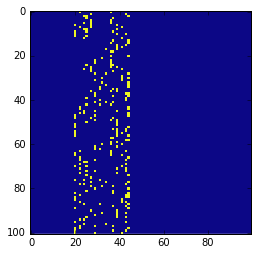

In [27]:
playable_data = preprocess_get_bottom(data, scale) \
    + preprocess_get_top(data, scale) \
    + preprocess_get_random(data, scale)
plt.imshow(playable_data, interpolation="none", cmap="plasma")

In [ ]:
stream = make_stream(playable_data, scale)

# stream.show()
play(stream)

In [ ]:
import time
import random

In [ ]:
def make_part(data, scale, instrument, preprocessor=None):
    part = Part()
    part.append(instrument)
    
    measure = Measure()
    
    if preprocessor is not None:
        data = preprocessor(data, scale)
    
    for position in range(len(data)):
        for scale_item in scale:
            if data[position][scale_item]:
                if position == 0 or not data[position-1][scale_item]:
                    duration = 1
                    while position + duration < len(data) \
                            and data[position + duration - 1][scale_item]:
                        duration += 1
                    note = Note(scale[scale_item])
                    note.duration = Duration(duration/4)
                    measure.insert(position/4, note)
                    
    part.append(measure)     
    return part

In [ ]:
data = np.asarray(data)

In [ ]:
data2 = np.copy(data)
data2[1::2] = data2[:-1:2]
plt.imshow(data2 , interpolation="none", cmap="plasma")

In [ ]:

scale = {
    20: "C3",
    24: "D#3",
    28: "F3",
    32: "F#3",
    36: "G3",
    40: "A#3",
    44: "C4",
    48: "D#4",
    52: "F4",
    56: "F#4",
    60: "G4",
    64: "A#4",
    68: "C5",
}

score = Score()

data = [np.random.randint(0, 2, 100, dtype=np.bool)]
p, q = random.choice([(7, 3), (40, 5), (100, 7), (200, 9)])
patterns = np.random.randint(0, 2, (p, q), dtype=np.bool)

for _ in range(30):
    data.append(step(data[-1], patterns))
data = np.asarray(data)

data2 = np.copy(data)
data2[1::2] = data2[:-1:2]

data3 = np.copy(data)
data3[1::3] = data3[:-2:3]
data3[2::3] = data3[:-2:3]

plt.imshow(data , interpolation="none", cmap="plasma")
plt.show()
plt.imshow(data2 , interpolation="none", cmap="plasma")
plt.show()
plt.imshow(data3 , interpolation="none", cmap="plasma")
plt.show()

playable_data = preprocess_get_random(data2 * np.concatenate([np.zeros(43), np.ones(57)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))
playable_data = preprocess_get_random(data2 * np.concatenate([np.zeros(43), np.ones(57)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))


playable_data = preprocess_get_random(data3 * np.concatenate([np.ones(31), np.zeros(69)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))


playable_data = preprocess_get_random(data3 * np.concatenate([np.zeros(31), np.ones(13), np.zeros(56)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))


playable_data = preprocess_get_random(data3 * np.concatenate([np.zeros(31), np.ones(13), np.zeros(56)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))


playable_data = preprocess_get_bottom(data3 * np.concatenate([np.ones(44), np.zeros(56)]), scale)
score.append(make_part(playable_data, scale, Xylophone()))



score.show()
play(score)

In [ ]:
while True:
    data = [np.random.randint(0, 2, 100, dtype=np.bool)]
    p, q = random.choice([(7, 3), (40, 5), (100, 7), (200, 9)])
    patterns = np.random.randint(0, 2, (p, q), dtype=np.bool)

    for _ in range(100):
        data.append(step(data[-1], patterns))
    
    scale = random.choice([scale_blues])

    
    playable_data = preprocess_get_bottom(data, scale) \
        + preprocess_get_random(data, scale) \
        + preprocess_get_random(data, scale)

    stream = make_stream(playable_data, scale)

    # stream.show()
    play(stream)
    
    time.sleep(1)